<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/An%C3%A1lise_de_IPOs_vs_Retorno_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de data de IPO vs. retorno

In [1]:
!pip install tradingcomdados
from tradingcomdados import alternative_data as ad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.3.2
    Uninstalling charset-normalizer-3.3.2:
      Successfully uninstalled charset-normalizer-3.3.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-lear

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [30]:
ibov = ad.index_composition('ibov', mode = 'list', reduction = False)

In [31]:
import yfinance as yf

In [32]:
ibov = yf.download([i+ '.SA' for i in ibov], start = '2012-01-01')['Adj Close']

[*********************100%%**********************]  86 of 86 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['VIIA3.SA', 'ALSO3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [33]:
ibov

Ticker,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,6.764980,5.557419,NaN,17.835535,NaN,NaN,2.086019,11.136729,5.343566,6.446294,...,9.054372,5.323815,8.433755,19.934242,NaN,NaN,NaN,21.099384,2.174414,4.330160
2012-01-03,6.687881,5.825582,NaN,17.647394,NaN,NaN,2.122390,11.086295,5.365649,6.586163,...,9.181254,5.476829,8.666022,20.821289,NaN,NaN,NaN,20.770397,2.225685,4.349501
2012-01-04,6.532433,5.774724,NaN,17.775322,NaN,NaN,2.160902,11.031275,5.365649,6.596663,...,8.989583,5.621523,8.481811,20.962627,NaN,NaN,NaN,21.046038,2.237339,4.349501
2012-01-05,6.403105,5.594408,NaN,17.910789,NaN,NaN,2.137367,10.916656,5.325515,6.554660,...,8.611644,5.581606,8.321623,20.402128,NaN,NaN,NaN,20.761503,2.251322,4.114983
2012-01-06,6.386939,5.686878,NaN,18.354797,NaN,NaN,2.169461,10.641556,5.405788,6.636571,...,8.355184,5.536701,8.329634,20.226677,NaN,NaN,NaN,20.290251,2.225685,4.279388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,12.630000,9.260000,NaN,59.380001,14.46,13.82,12.360000,56.029999,12.680000,14.200000,...,30.070000,28.389999,9.930000,60.900002,8.38,25.26,NaN,51.680000,37.944763,18.410000
2024-03-19,12.540000,9.150000,NaN,59.599998,14.73,13.79,12.310000,55.830002,12.630000,14.120000,...,30.100000,28.389999,10.170000,61.400002,8.29,25.00,NaN,51.189999,38.703659,18.870001
2024-03-20,12.540000,9.500000,NaN,63.119999,14.93,14.40,12.750000,56.430000,12.880000,14.300000,...,30.670000,28.620001,10.380000,61.810001,8.88,25.00,NaN,51.270000,38.773560,19.299999


In [19]:
ibov_norm = ibov/ibov.iloc[0]

<Axes: xlabel='Date'>

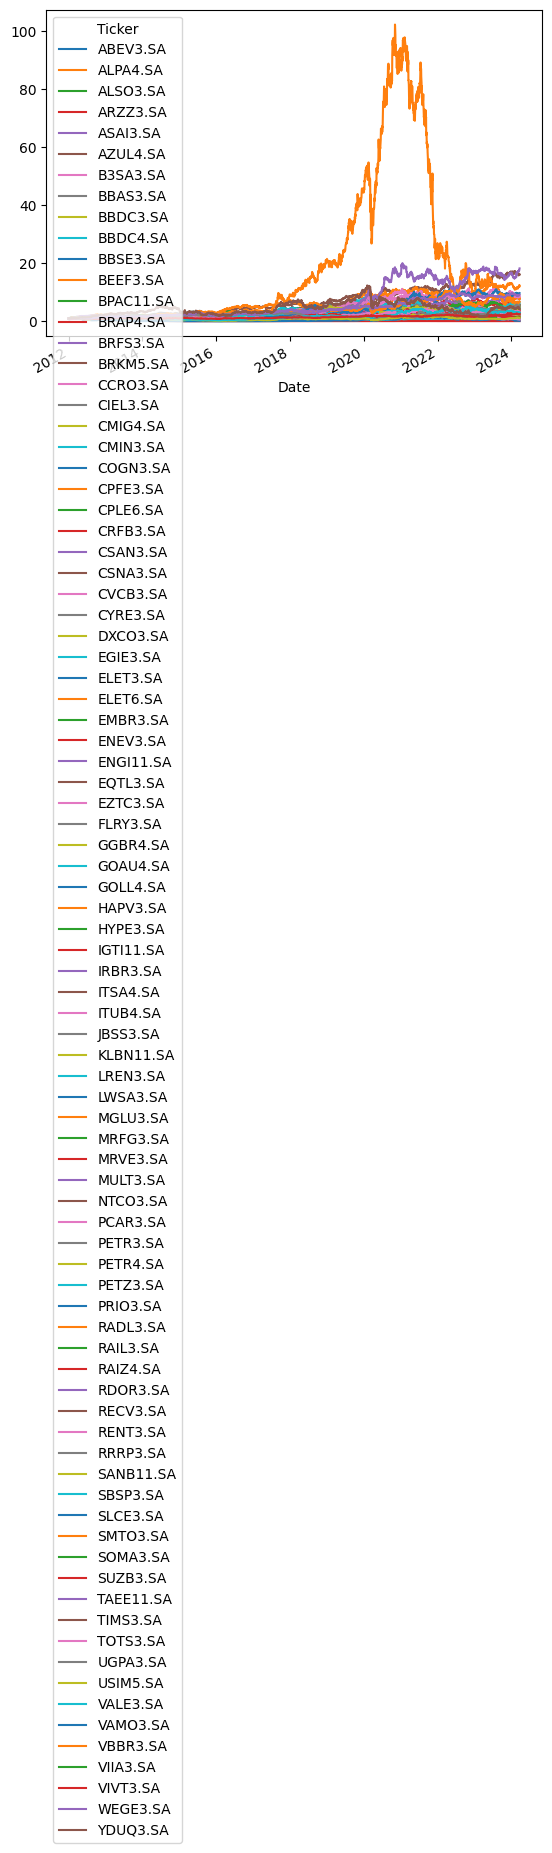

In [20]:
ibov.plot()

In [21]:
ibov.iloc[-1][ibov.iloc[-1]<1]

Ticker
BRFS3.SA    0.520555
CIEL3.SA    0.914742
ENEV3.SA    0.071777
GOLL4.SA    0.138340
PCAR3.SA    0.624795
Name: 2024-03-22 00:00:00, dtype: float64

In [22]:
len(ibov.iloc[-1][ibov.iloc[-1]<1])

5

In [23]:
len(ibov.iloc[-1])

86

In [28]:
ibov.iloc[0]

Ticker
ABEV3.SA    1.0
ALPA4.SA    1.0
ALSO3.SA    NaN
ARZZ3.SA    1.0
ASAI3.SA    NaN
           ... 
VBBR3.SA    NaN
VIIA3.SA    NaN
VIVT3.SA    1.0
WEGE3.SA    1.0
YDUQ3.SA    1.0
Name: 2012-01-02 00:00:00, Length: 86, dtype: float64

In [34]:
first_valid_index = ibov.apply(lambda x: x.first_valid_index(), axis=0)

In [35]:
first_valid_index

Ticker
ABEV3.SA   2012-01-02
ALPA4.SA   2012-01-02
ALSO3.SA          NaT
ARZZ3.SA   2012-01-02
ASAI3.SA   2021-03-01
              ...    
VBBR3.SA   2018-03-14
VIIA3.SA          NaT
VIVT3.SA   2012-01-02
WEGE3.SA   2012-01-02
YDUQ3.SA   2012-01-02
Length: 86, dtype: datetime64[ns]

In [36]:
first_valid_index[first_valid_index!='2012-01-02']

Ticker
ALSO3.SA           NaT
ASAI3.SA    2021-03-01
AZUL4.SA    2017-04-11
BBSE3.SA    2013-04-29
BPAC11.SA   2017-02-24
CMIN3.SA    2021-02-22
COGN3.SA    2012-03-14
CRFB3.SA    2017-07-20
CVCB3.SA    2013-12-09
HAPV3.SA    2018-04-26
IGTI11.SA   2021-11-22
IRBR3.SA    2017-07-31
KLBN11.SA   2014-01-23
LWSA3.SA    2020-02-06
NTCO3.SA    2019-12-18
PETZ3.SA    2020-09-15
RAIL3.SA    2015-04-02
RAIZ4.SA    2021-08-05
RDOR3.SA    2020-12-15
RECV3.SA    2021-05-05
RRRP3.SA    2020-11-12
SOMA3.SA    2020-07-31
VAMO3.SA    2021-02-02
VBBR3.SA    2018-03-14
VIIA3.SA           NaT
dtype: datetime64[ns]

In [39]:
list(first_valid_index[first_valid_index!='2012-01-02'].index)[0]

'ALSO3.SA'

In [41]:
ibov[list(first_valid_index[first_valid_index!='2012-01-02'].index)[1]]

Date
2012-01-02      NaN
2012-01-03      NaN
2012-01-04      NaN
2012-01-05      NaN
2012-01-06      NaN
              ...  
2024-03-18    14.46
2024-03-19    14.73
2024-03-20    14.93
2024-03-21    14.82
2024-03-22    14.37
Name: ASAI3.SA, Length: 3034, dtype: float64

In [43]:
ibov[list(first_valid_index[first_valid_index!='2012-01-02'].index)[1]].dropna()

Date
2021-03-01    13.990467
2021-03-02    14.206007
2021-03-03    13.970874
2021-03-04    14.343169
2021-03-05    14.695870
                ...    
2024-03-18    14.460000
2024-03-19    14.730000
2024-03-20    14.930000
2024-03-21    14.820000
2024-03-22    14.370000
Name: ASAI3.SA, Length: 765, dtype: float64

In [51]:
(first_valid_index[first_valid_index!='2012-01-02'].index)[1]

'ASAI3.SA'

In [54]:
list(first_valid_index[first_valid_index!='2012-01-02'].index)

['ALSO3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'BBSE3.SA',
 'BPAC11.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CRFB3.SA',
 'CVCB3.SA',
 'HAPV3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'KLBN11.SA',
 'LWSA3.SA',
 'NTCO3.SA',
 'PETZ3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'RRRP3.SA',
 'SOMA3.SA',
 'VAMO3.SA',
 'VBBR3.SA',
 'VIIA3.SA']

In [44]:
df = ibov[list(first_valid_index[first_valid_index!='2012-01-02'].index)[1]].dropna()
df_norm = df/df.iloc[0]

In [49]:
100*(df_norm.iloc[-1] - 1)

2.712795877974128

In [52]:
dicionario = {(first_valid_index[first_valid_index!='2012-01-02'].index)[1]:100*(df_norm.iloc[-1] - 1)}

In [53]:
dicionario

{'ASAI3.SA': 2.712795877974128}

In [55]:
ibov.columns

Index(['ABEV3.SA', 'ALPA4.SA', 'ALSO3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA',
       'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA',
       'BPAC11.SA', 'BRAP4.SA', 'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA', 'CIEL3.SA',
       'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA',
       'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'EGIE3.SA',
       'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA',
       'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA',
       'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA',
       'KLBN11.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA',
       'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'PRIO3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RECV3.SA',
       'RENT3.SA', 'RRRP3.SA', 'SANB11.SA', 'SBSP3.SA', 'SLCE3.SA', 'SMTO3.SA',
       'SOMA3.SA', 'SUZB3.SA', 'TAEE11.SA', 'TI

In [56]:
ibov['TOTS3.SA']

Date
2012-01-02     9.054372
2012-01-03     9.181254
2012-01-04     8.989583
2012-01-05     8.611644
2012-01-06     8.355184
                ...    
2024-03-18    30.070000
2024-03-19    30.100000
2024-03-20    30.670000
2024-03-21    31.000000
2024-03-22    30.520000
Name: TOTS3.SA, Length: 3034, dtype: float64

In [57]:
dicionario = dict()

In [59]:
i = 'AZUL4.SA'

In [60]:
df = ibov[i].dropna()

In [61]:
df_norm = df/df.iloc[0]

In [74]:
df_norm

Date
2012-01-02    1.000000
2012-01-03    1.048253
2012-01-04    1.039102
2012-01-05    1.006656
2012-01-06    1.023295
                ...   
2024-03-18    1.666241
2024-03-19    1.646448
2024-03-20    1.709427
2024-03-21    1.666241
2024-03-22    1.691432
Name: ALPA4.SA, Length: 3034, dtype: float64

In [76]:
ibov = ibov.dropna(axis=1, how='all')

In [85]:
ipo = dict()
dicionario = dict()

In [86]:
for i in ibov.columns:
    local = ibov[i].dropna()
    df_normal = local/local.iloc[0]
    total_return = 100*(df_normal.iloc[-1] - 1)
    dicionario[i] = total_return
    ipo[i] = ibov[i].first_valid_index()

In [87]:
import pandas as pd

In [92]:
acoes = pd.DataFrame({'retornos': dicionario, 'ipos':ipo})

In [88]:
pd.DataFrame.from_dict(ipo, orient = 'index')

,0
ABEV3.SA,2012-01-02
ALPA4.SA,2012-01-02
ARZZ3.SA,2012-01-02
ASAI3.SA,2021-03-01
AZUL4.SA,2017-04-11
...,...
VAMO3.SA,2021-02-02
VBBR3.SA,2018-03-14
VIVT3.SA,2012-01-02
WEGE3.SA,2012-01-02


In [91]:
import seaborn as sns

In [97]:
acoes_filt = acoes[acoes['ipos'] > '2018-01-02']

In [98]:
acoes_filt

,retornos,ipos
ASAI3.SA,2.712796,2021-03-01
CMIN3.SA,-11.113132,2021-02-22
HAPV3.SA,-28.621330,2018-04-26
IGTI11.SA,21.421298,2021-11-22
LWSA3.SA,14.426554,2020-02-06
NTCO3.SA,-47.222842,2019-12-18
PETZ3.SA,-67.753938,2020-09-15
RAIZ4.SA,-47.357359,2021-08-05
RDOR3.SA,-58.274019,2020-12-15
RECV3.SA,57.891950,2021-05-05


<Axes: xlabel='ipos', ylabel='retornos'>

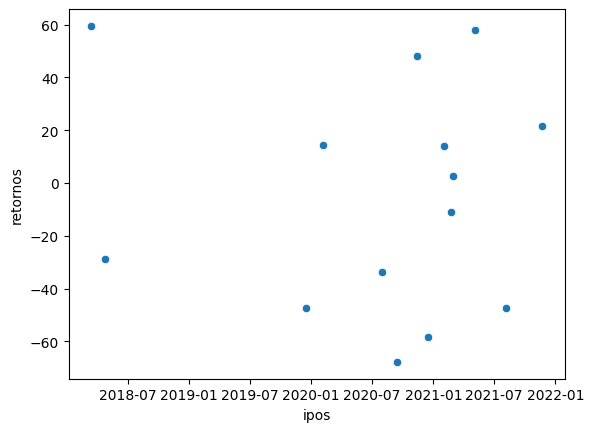

In [99]:
sns.scatterplot(data=acoes_filt, x="ipos", y="retornos")